# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from datetime import datetime 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    print(f"Endpoint URL for city {i + 1} ({city}): {city_url}")
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']  # Latitude
        city_lng = city_weather['coord']['lon']  # Longitude
        city_max_temp = city_weather['main']['temp_max']  # Maximum temperature
        city_humidity = city_weather['main']['humidity']  # Humidity
        city_clouds = city_weather['clouds']['all']  # Cloudiness
        city_wind = city_weather['wind']['speed']  # Wind speed
        city_country = city_weather['sys']['country']  # Country
        city_date = city_weather['dt']  # Date (Unix timestamp)


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Endpoint URL for city 1 (anadyr): http://api.openweathermap.org/data/2.5/weather?appid=05b0a15832b8ed6b6c9c03669377587c&q=anadyr&units=metric
Processing Record 1 of Set 1 | anadyr
Endpoint URL for city 2 (khandyga): http://api.openweathermap.org/data/2.5/weather?appid=05b0a15832b8ed6b6c9c03669377587c&q=khandyga&units=metric
Processing Record 2 of Set 1 | khandyga
Endpoint URL for city 3 (waitangi): http://api.openweathermap.org/data/2.5/weather?appid=05b0a15832b8ed6b6c9c03669377587c&q=waitangi&units=metric
Processing Record 3 of Set 1 | waitangi
Endpoint URL for city 4 (saint croix): http://api.openweathermap.org/data/2.5/weather?appid=05b0a15832b8ed6b6c9c03669377587c&q=saint croix&units=metric
Processing Record 4 of Set 1 | saint croix
Endpoint URL for city 5 (bilibino): http://api.openweathermap.org/data/2.5/weather?appid=05b0a15832b8ed6b6c9c03669377587c&q=bilibino&units=metric
Processing Record 5 of Set 1 | bilibino
Endpoin

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-7.72,78,0,6.71,RU,1730846565
1,khandyga,62.6667,135.6000,-24.67,99,100,1.10,RU,1730846566
2,waitangi,-43.9535,-176.5597,12.82,91,97,3.20,NZ,1730846567
3,saint croix,17.7397,-64.7388,27.20,84,75,4.12,VI,1730846578
4,bilibino,68.0546,166.4372,-22.57,99,100,0.49,RU,1730846579


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-7.72,78,0,6.71,RU,1730846565
1,khandyga,62.6667,135.6000,-24.67,99,100,1.10,RU,1730846566
2,waitangi,-43.9535,-176.5597,12.82,91,97,3.20,NZ,1730846567
3,saint croix,17.7397,-64.7388,27.20,84,75,4.12,VI,1730846578
4,bilibino,68.0546,166.4372,-22.57,99,100,0.49,RU,1730846579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

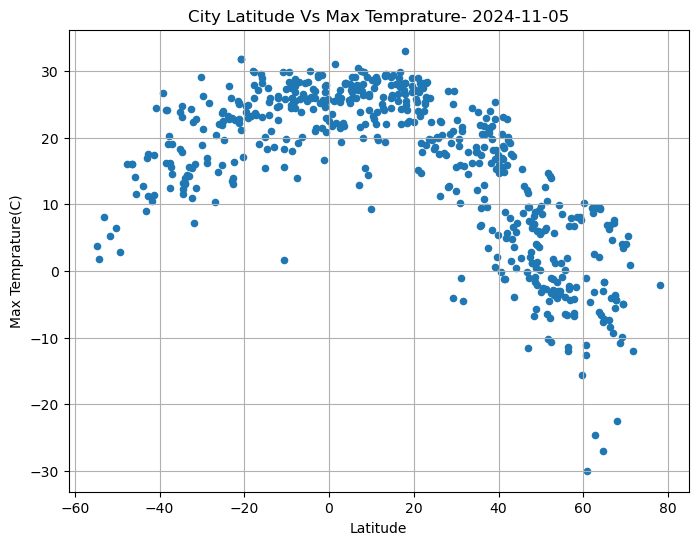

In [42]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,6))

# Set the title with the current date
# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Latitude Vs Max Temprature- {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

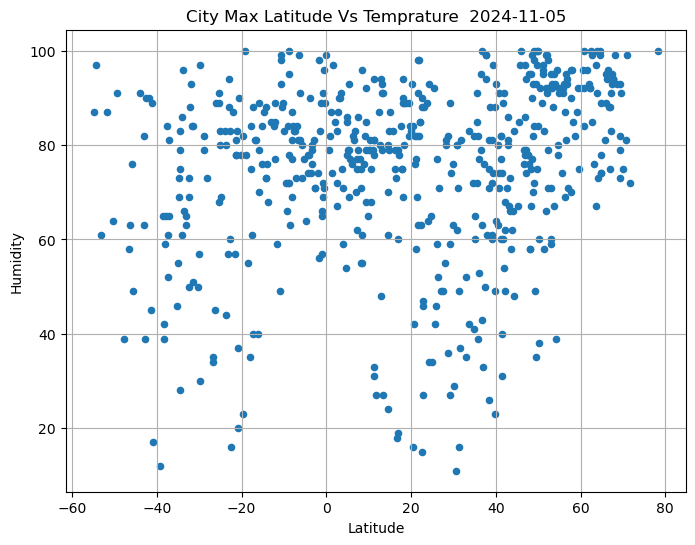

In [41]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,6))
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'])
# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
# Set the title with the current date
plt.title(f"City Max Latitude Vs Temprature  {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

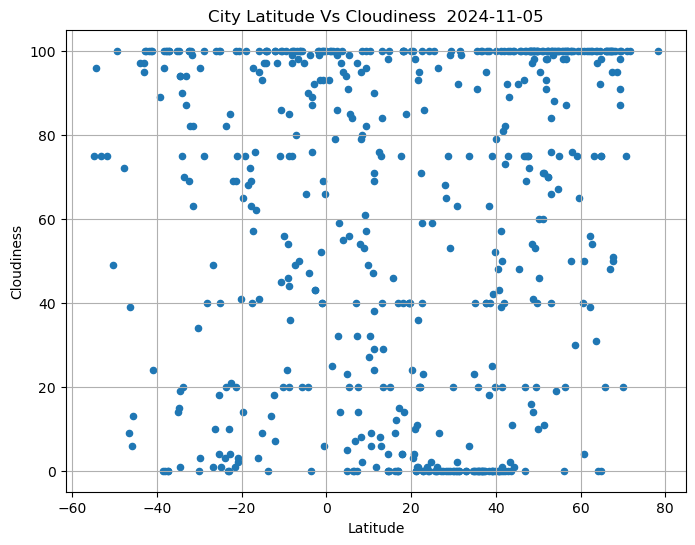

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,6))
# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
# Set the title with the current date
plt.title(f"City Latitude Vs Cloudiness  {current_date}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

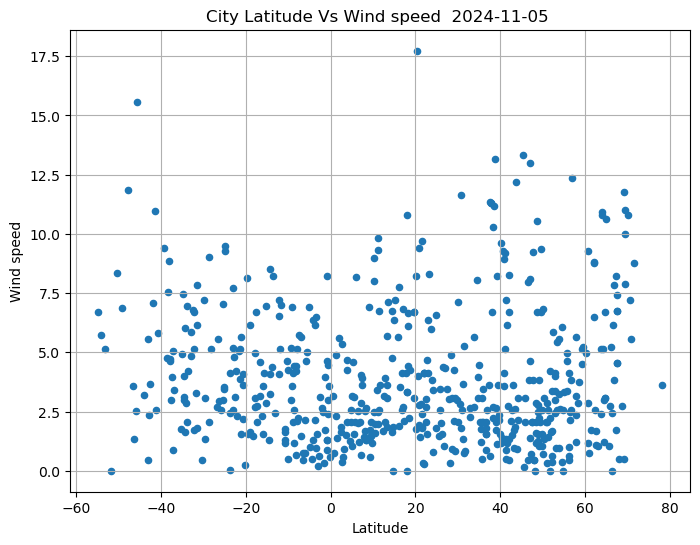

In [44]:
# Build the scatter plots for latitude vs. wind speed

city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,6))
# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
# Set the title with the current date
plt.title(f"City Latitude Vs Wind speed  {current_date} ")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")

plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y,x_label='x-axis',y_label='y-axis', title='Linear Regression Plot'):
    x = np.array(x)
    y = np.array(y)
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_eq, xy=(0.25 * np.min(x), 0.90 * np.max(y)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r^2 value is : {rvalue**2}")
   


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-7.72,78,0,6.71,RU,1970-01-01 00:00:01.730846565
1,khandyga,62.6667,135.6000,-24.67,99,100,1.10,RU,1970-01-01 00:00:01.730846566
3,saint croix,17.7397,-64.7388,27.20,84,75,4.12,VI,1970-01-01 00:00:01.730846578
4,bilibino,68.0546,166.4372,-22.57,99,100,0.49,RU,1970-01-01 00:00:01.730846579
5,phongsali,21.6833,102.1058,14.72,98,93,0.32,LA,1970-01-01 00:00:01.730846580


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.82,91,97,3.20,NZ,1970-01-01 00:00:01.730846567
10,port-aux-francais,-49.3500,70.2167,2.83,91,100,6.87,TF,1970-01-01 00:00:01.730846604
14,edinburgh of the seven seas,-37.0676,-12.3116,14.53,81,100,3.42,SH,1970-01-01 00:00:01.730846609
20,coquimbo,-29.9533,-71.3436,18.88,57,0,7.20,CL,1970-01-01 00:00:01.730846596
23,port saint john's,-31.6229,29.5448,16.01,84,99,6.16,ZA,1970-01-01 00:00:01.730846619


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is : 0.6901121136195599


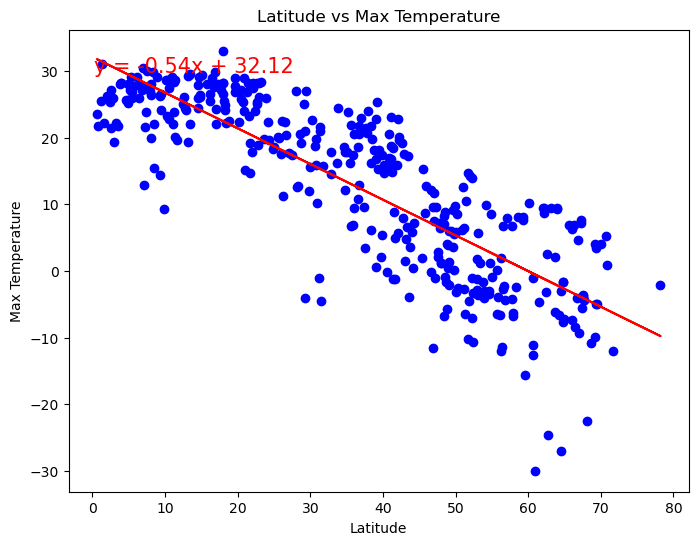

In [68]:
# Linear regression on Northern Hemisphere city_data_df
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Max Temperature",title="Latitude vs Max Temperature")


The r^2 value is : 0.4230803441951882


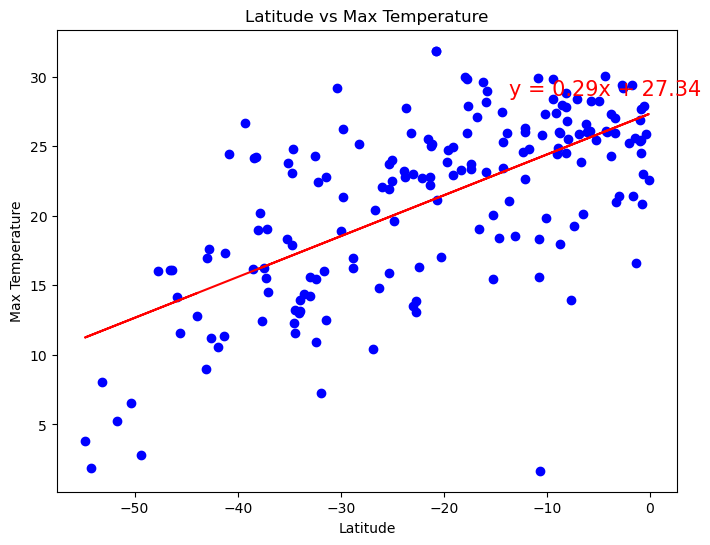

In [69]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Max Temperature",title="Latitude vs Max Temperature")

**Discussion about the linear relationship:** Discussion about the linear relationship:

Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation.

The equation (-0.54x + 32.12) indicates a linear relationship with a negative slope of (-0.54),suggesting a negative correlation between the two variables.

The r-value is ~ 0.70 (rounded up)
This (R^2) value is relatively high, which suggests that the negative correlation is quite strong.Max temperature drops as the latitude increases.

Southern Hemisphere:
Here we have a moderate positive correlation between latitude and max tempuratures
The r-value is ~ 0.42 (rounded up)

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is : 0.06439324585656646


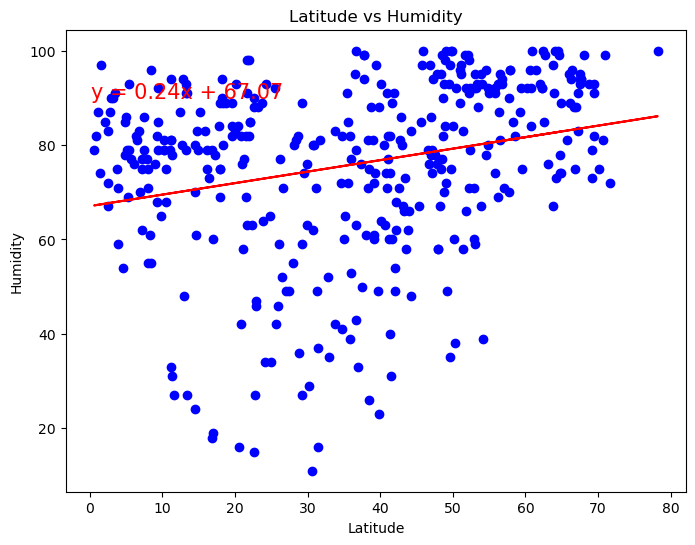

In [70]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Humidity",title="Latitude vs Humidity")

The r^2 value is : 0.06890206793206025


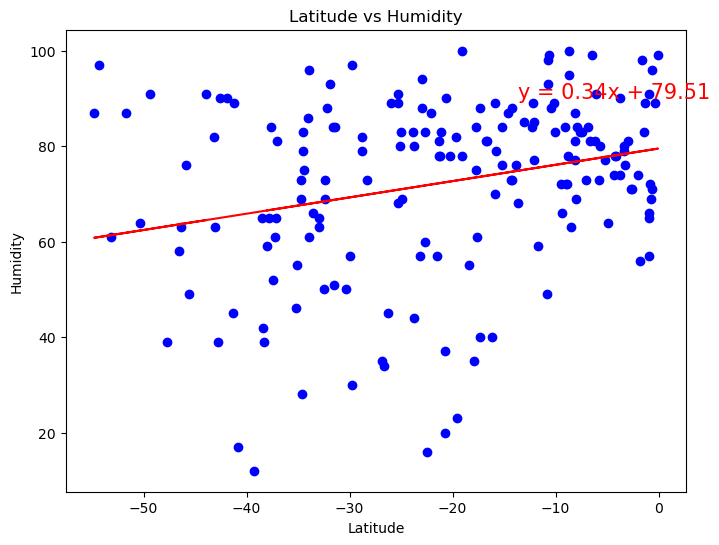

In [71]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Humidity",title="Latitude vs Humidity")


**Discussion about the linear relationship:**


The r^2 value is :  0.064 (rounded up)
This (R^2) value is quite low, suggesting that the positive correlation is weak. In summary, we have a weak positive correlation between the latitude and humidity

Southern Hemisphere:
Here we have a weak positive correlation between latitude and humidity
The r-value is ~  0.069 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is : 0.09337931965146493


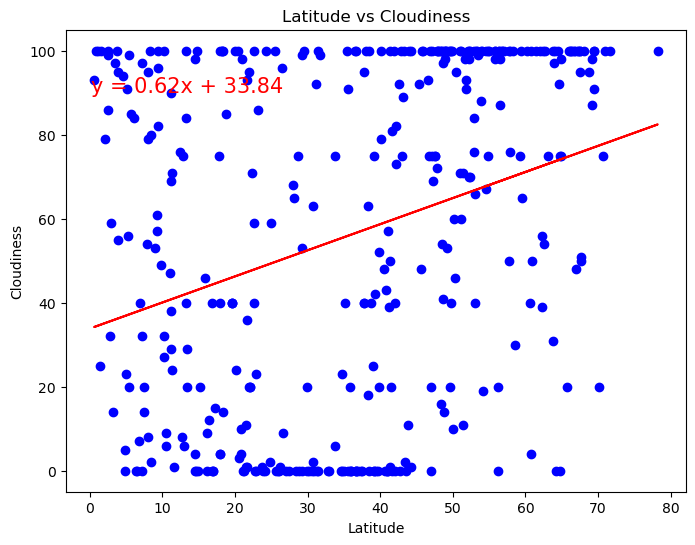

In [72]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Cloudiness",title="Latitude vs Cloudiness")

The r^2 value is : 0.003926159345922148


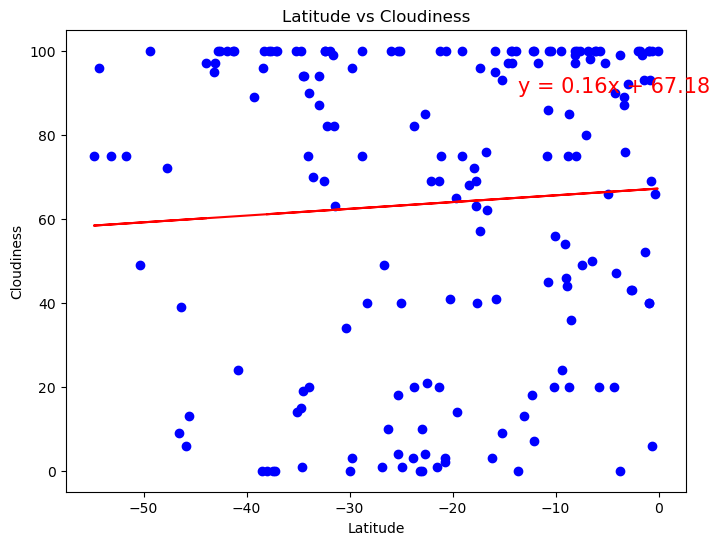

In [73]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Cloudiness",title="Latitude vs Cloudiness")

**Discussion about the linear relationship:**
Northern Hemisphere:

There is weak positive correlation between Latitude and Cloudliness
The r-value is ~ 0.09 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Cloudliness.In this case, while there is technically a positive correlation due to the positive slope, the very low (R^2) value indicates that the relationship is negligible. Therefore, it could be interpreted as being close to no correlation in practical terms, but it is not exactly no correlation. It reflects a very weak positive correlation.
The r-value is ~ 0.003926159345922148

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is : 0.014509423869481848


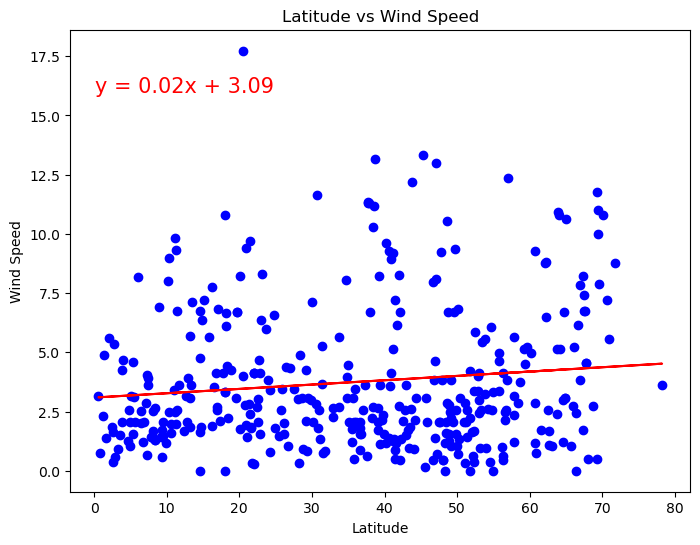

In [74]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Wind Speed",title="Latitude vs Wind Speed")

The r^2 value is : 0.0954402093399521


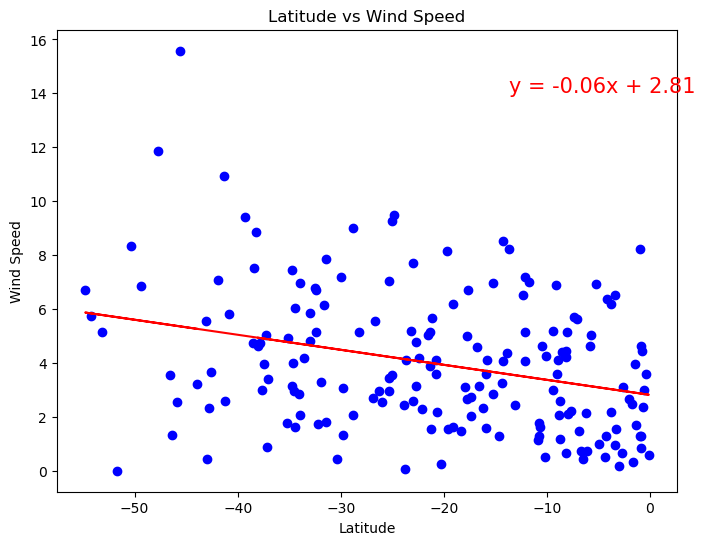

In [76]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
plot_linear_regression(x,y,x_label="Latitude",y_label="Wind Speed",title="Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
Northern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.01 (rounded up)


Southern Hemisphere:

There is weak negative correlation between Latitude and Wind Speed
The r-value is ~ 0.09 (rounded up)